<a href="https://colab.research.google.com/github/Shravani703/BookRecommender/blob/main/Collaborative_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import requests
books=pd.read_csv('/content/drive/MyDrive/Ops Final/Books.csv')
ratings=pd.read_csv('/content/drive/MyDrive/Ops Final/Ratings.csv')
users=pd.read_csv('/content/drive/MyDrive/Ops Final/Users.csv')

ratings_books = ratings.merge(books,on='ISBN')
def clean_booktitle(title):
    return str(title).title().strip()
ratings_books['Book-Title'] = ratings_books['Book-Title'].apply(clean_booktitle)
ratings_books = ratings_books[ratings_books['User-ID'].map(ratings_books['User-ID'].value_counts()) > 50]
ratings_books = ratings_books[ratings_books['Book-Title'].map(ratings_books['Book-Title'].value_counts()) > 50]
ratings_books = ratings_books.reset_index(drop=True)

data_matrix = ratings_books.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
data_matrix.fillna(0,inplace=True)
similarity_scores_books = cosine_similarity(data_matrix)

def recommend_books(ratings_books,book_name):

    if ratings_books['Book-Title'].str.contains(book_name).any()==False:
        return -1

    index = np.where(data_matrix.index==book_name)[0][0]

    similar_items = list(enumerate(similarity_scores_books[index]))
    similar_items = sorted(similar_items,key = lambda x:x[1],reverse=True)[1:8]

    book_recommend = []
    for i in similar_items:
        temp_df = ratings_books[ratings_books['Book-Title'] == data_matrix.index[i[0]]]
        book_recommend.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
    return book_recommend

<ipython-input-3-6193b720d490>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('/content/drive/MyDrive/Ops Final/Books.csv')


<Axes: >

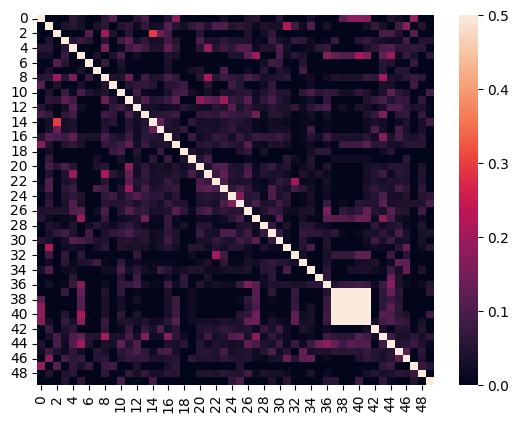

In [ ]:
import seaborn
seaborn.heatmap(similarity_scores_books[1000:1050, 1000:1050], vmax=0.5)

In [ ]:
i=0
k=1
while k<1351:
  j=1
  while j < 1351:
    if similarity_scores_books[k,j]>0.8:
      i= i + 1
    j= j + 1
  k=k+1
print(i)
print(j)
print(k)

1356
1351
1351


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
books=pd.read_csv('/content/drive/MyDrive/Ops Final/Books.csv')
ratings=pd.read_csv('/content/drive/MyDrive/Ops Final/Ratings.csv')
users=pd.read_csv('/content/drive/MyDrive/Ops Final/Users.csv')

NameError: name 'pd' is not defined

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(ratings.shape)
print(books.shape)
print(users.shape)

(1149780, 3)
(271360, 8)
(278858, 3)


In [ ]:
ratings_books = ratings.merge(books,on='ISBN')

In [ ]:
len(pd.unique(ratings_books['ISBN']))

140044

In [ ]:
rbu_df = ratings_books.merge(users,on='User-ID')

In [ ]:
ratings_books.shape

(1031136, 10)

**Cleaning the title - removes trailing spaces, converts to title case**

In [ ]:
def clean_booktitle(title):
    return str(title).title().strip()

ratings_books['Book-Title'] = ratings_books['Book-Title'].apply(clean_booktitle)

In [ ]:
ratings_books['Book-Title'].to_excel("/content/drive/MyDrive/Ops Final/titles.xlsx")

**User constraint & book constraint - looping through each user & book**



In [ ]:
print("Shape before filtering:",ratings_books.shape)
ratings_books = ratings_books[ratings_books['User-ID'].map(ratings_books['User-ID'].value_counts()) > 50]

ratings_books = ratings_books[ratings_books['Book-Title'].map(ratings_books['Book-Title'].value_counts()) > 50]

ratings_books = ratings_books.reset_index(drop=True)
print("Shape after filtering:",ratings_books.shape)

Shape before filtering: (1031136, 10)
Shape after filtering: (133425, 10)


In [ ]:
ratings_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


**New data frame with column users, row books. Each row is a vector.**

In [ ]:
data_matrix = ratings_books.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
data_matrix.fillna(0,inplace=True)

In [ ]:
type(data_matrix)

pandas.core.frame.DataFrame

In [ ]:
data_matrix.to_excel("/content/drive/MyDrive/Ops Final/book_list.xlsx")

In [ ]:
import random
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import requests
#pd.set_option('max_colwidth', 1000)

In [ ]:
similarity_scores_books = cosine_similarity(data_matrix)

In [ ]:
similarity_scores_books

array([[1.        , 0.04612255, 0.06374442, ..., 0.05526131, 0.03761358,
        0.02104474],
       [0.04612255, 1.        , 0.01695641, ..., 0.03826821, 0.12763956,
        0.09490141],
       [0.06374442, 0.01695641, 1.        , ..., 0.07303747, 0.        ,
        0.        ],
       ...,
       [0.05526131, 0.03826821, 0.07303747, ..., 1.        , 0.04144573,
        0.01093041],
       [0.03761358, 0.12763956, 0.        , ..., 0.04144573, 1.        ,
        0.06627547],
       [0.02104474, 0.09490141, 0.        , ..., 0.01093041, 0.06627547,
        1.        ]])

**An array that contains n number of lists (if there are n number of books), list 1 has the cosine similarity between row1/book1 and every other row/book**

In [ ]:
import pandas as pd
df = pd.DataFrame(similarity_scores_books)
df.to_excel("/content/drive/MyDrive/Ops Final/similarity_scores.xlsx")


*   **book_name is the input variable. if we do not have the book title the user has entered return -1**
*  **index is an array of the position number of a book_name entered if the book exists in our database. The book '1984' for example is in position 1, therefore the index will return 0**
*  **enumerate function creates key value pairs of (counter, similarity score value), first book it evaluates will have a counter of 0 and so forth**
*  **lambda function sorts the list in descending order**
*  **[1:8] results second to ninth most similar book, first most similar book is the same book itself and is thereby ignored**

In [ ]:
df = pd.DataFrame(ratings_books['Book-Title'])
df.to_excel("/content/drive/MyDrive/Ops Final/book_list.xlsx")

In [ ]:
def recommend_books(ratings_books,book_name):

    if ratings_books['Book-Title'].str.contains(book_name).any()==False:
        return -1

    index = np.where(data_matrix.index==book_name)[0][0]

    similar_items = list(enumerate(similarity_scores_books[index]))
    similar_items = sorted(similar_items,key = lambda x:x[1],reverse=True)[1:8]

    book_recommend = []
    for i in similar_items:
        temp_df = ratings_books[ratings_books['Book-Title'] == data_matrix.index[i[0]]]
        book_recommend.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
    return book_recommend


In [ ]:
input_book = input("Name a book that you like!")
input_book = input_book.title()
recommend_books(ratings_books, input_book)

Name a book that you like!1984


['Animal Farm',
 'Brave New World',
 'American Psycho (Vintage Contemporaries)',
 'The Vampire Lestat (Vampire Chronicles, Book Ii)',
 "Slaughterhouse Five Or The Children'S Crusade: A Duty Dance With Death",
 'Timeline',
 "The Handmaid'S Tale"]

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st

In [ ]:
def main():
    st.title("Book Recommender System")

    # Sidebar to input book title
    book_title = st.sidebar.text_input("Enter a Book Title")

    if st.sidebar.button("Recommend"):
        if book_title:
            recommended_books = recommend_books(book_title)
            st.subheader("Recommended Books:")

        else:
            st.write("Please enter a valid book title.")

if __name__ == '__main__':
    main()

In [ ]:
streamlit run

SyntaxError: invalid syntax (<ipython-input-43-caa15f321561>, line 1)

**KNN ALGORITHM**

In [ ]:
data_matrix.values

array([[ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 10.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
data_matrix.values.shape

(693, 807)

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
features_matrix = csr_matrix(data_matrix)

In [ ]:
model_NN = NearestNeighbors(n_neighbors=7, algorithm="brute", metric="cosine")

In [ ]:
model_NN.fit(X=features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=7)

In [ ]:
distances, indices = model_NN.kneighbors(X=data_matrix.iloc[4, :].values.reshape(1, -1), n_neighbors=7, return_distance=True)

In [ ]:
distances

array([[3.33066907e-16, 7.04373882e-01, 7.08578584e-01, 7.39566496e-01,
        7.53683127e-01, 7.60635804e-01, 7.63477036e-01]])

In [ ]:
indices

array([[  4,  24, 556, 413, 179, 118, 353]])

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(data_matrix.index[2]))
    else:
        print('{0}: {1}, with distance of {0}:'.format(i, data_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 2Nd Chance:

1: A Walk To Remember, with distance of 1:
2: The Last Time They Met : A Novel, with distance of 2:
3: Sea Glass: A Novel, with distance of 3:
4: Family Album, with distance of 4:
5: Cradle And All, with distance of 5:
6: Nights In Rodanthe, with distance of 6:


In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.91.140.233


In [ ]:
%%writefile app.py
import numpy as np
import pandas as pd
import random
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import requests
books=pd.read_csv('/content/drive/MyDrive/Ops Final/Books.csv')
ratings=pd.read_csv('/content/drive/MyDrive/Ops Final/Ratings.csv')
users=pd.read_csv('/content/drive/MyDrive/Ops Final/Users.csv')

ratings_books = ratings.merge(books,on='ISBN')
def clean_booktitle(title):
    return str(title).title().strip()
ratings_books['Book-Title'] = ratings_books['Book-Title'].apply(clean_booktitle)
ratings_books = ratings_books[ratings_books['User-ID'].map(ratings_books['User-ID'].value_counts()) > 50]
ratings_books = ratings_books[ratings_books['Book-Title'].map(ratings_books['Book-Title'].value_counts()) > 50]
ratings_books = ratings_books.reset_index(drop=True)

data_matrix = ratings_books.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
data_matrix.fillna(0,inplace=True)
similarity_scores_books = cosine_similarity(data_matrix)

def recommend_books(ratings_books,book_name):

    if ratings_books['Book-Title'].str.contains(book_name).any()==False:
        return -1

    index = np.where(data_matrix.index==book_name)[0][0]

    similar_items = list(enumerate(similarity_scores_books[index]))
    similar_items = sorted(similar_items,key = lambda x:x[1],reverse=True)[1:8]

    book_recommend = []
    for i in similar_items:
        temp_df = ratings_books[ratings_books['Book-Title'] == data_matrix.index[i[0]]]
        book_recommend.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
    return book_recommend

import streamlit as st
st.title("Book Recommender System")
book_title = st.sidebar.text_input("Enter a Book Title")
if st.sidebar.button("Recommend"):
  if book_title:
    recommended_books = recommend_books(ratings_books, book_title)
    st.subheader("Recommended Books:")
    st.write(recommended_books)
  else:
    st.write("Sorry! This book does not exist in our dataset")

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
npx: installed 22 in 1.878s
your url is: https://tricky-pigs-like.loca.lt
